<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#realtime-test" data-toc-modified-id="realtime-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>realtime test</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>plot</a></span><ul class="toc-item"><li><span><a href="#drum-note" data-toc-modified-id="drum-note-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>drum note</a></span></li><li><span><a href="#real-time" data-toc-modified-id="real-time-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>real-time</a></span></li></ul></li></ul></div>

Try id #259

In [1]:
import sys
sys.path.append('..')

import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
import taiko as tk
from taiko.play import *
from taiko.performance import *
from taiko.model import *
from taiko.database import *
from taiko.visualize import *

from sklearn.model_selection import train_test_split
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread

sns.set(font_scale=1.5)

Using TensorFlow backend.


In [3]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41
10,aaaaa,2,L_2018-09-28_114710.csv,R_2018-09-28_114713.csv,capture_2018_09_28_11_47_13


In [4]:
print(record_df.loc[341])

drummer_name                                 kdchang
song_id                                            1
left_sensor_datetime         L_2018-09-28_193539.csv
right_sensor_datetime        R_2018-09-28_193541.csv
capture_datetime         capture_2018_09_28_19_35_41
Name: 341, dtype: object


In [5]:
id_ = 341
record_row = record_df.loc[id_]
play = get_play(record_row)
pf = get_performance(play, id_=id_)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# realtime test

In [6]:
lgbm = LGBM()

train_df = pf.copy()
x = train_df.drop('timestamp', axis=1)
ts = train_df['timestamp']
train_df

,timestamp,L_A_AI,R_A_AI,L_G_AI,R_G_AI,L_AX_AI,R_AX_AI,L_AY_AI,R_AY_AI,L_AZ_AI,...,L_AYZ_CORR,R_AYZ_CORR,L_AZX_CORR,R_AZX_CORR,L_GXY_CORR,R_GXY_CORR,L_GYZ_CORR,R_GYZ_CORR,L_GZX_CORR,R_GZX_CORR
0,1.538135e+09,3.0007,4.0554,-0.4884,-2.8185,0.8949,2.0356,2.1440,-1.1816,2.9954,...,0.5790,1.3062,13.2447,4.6234,-0.6669,-0.6626,0.9666,0.1844,-0.1037,0.4449
1,1.538135e+09,3.1028,5.3683,-0.5682,-2.8757,1.0024,2.8912,4.0473,0.8572,3.1684,...,0.9330,1.0040,17.0105,2.7466,-0.9513,0.5751,-0.4313,0.2929,-0.8684,0.1976
2,1.538135e+09,3.1075,5.5046,-0.6281,-2.8218,1.1325,3.6466,1.0230,2.0135,3.1652,...,0.5806,8.1940,19.8730,1.5594,-0.9876,0.9530,-0.9807,0.9946,0.7870,0.7700
3,1.538135e+09,2.9650,5.2527,-0.5616,-2.7009,1.0825,4.3634,-1.6110,2.2851,2.9770,...,0.1922,5.7495,12.6068,1.8616,-0.9323,0.0720,-0.3343,0.9459,0.5445,0.7487
4,1.538135e+09,2.8878,4.6927,-0.5832,-2.6329,1.0293,4.1977,-0.3335,1.7956,2.8705,...,0.6351,3.5706,6.6681,1.4343,-0.8441,0.4725,-0.6803,0.6748,0.0692,0.6795
5,1.538135e+09,2.9052,3.9595,-0.5641,-2.6420,1.0562,3.2962,1.2656,1.0202,2.9068,...,0.4984,3.2227,8.7280,0.8545,-0.9818,0.8903,-0.9116,0.8242,0.3704,0.7574
6,1.538135e+09,3.0218,5.7179,-0.4620,-2.7654,1.1135,3.4915,4.1413,0.6051,3.0684,...,0.1691,7.4463,11.4014,1.8433,-0.5856,-0.3153,-0.3570,0.9960,0.9406,0.9652
7,1.538135e+09,3.1359,5.8032,-0.3828,-2.8553,1.2315,3.3280,4.0521,1.4056,3.1186,...,0.2672,8.3740,9.0088,2.2217,-0.5976,-0.2025,0.2320,0.9437,0.8463,0.9665
8,1.538135e+09,3.1898,4.4371,-0.3989,-2.8696,1.3311,2.3825,2.4970,2.4182,3.2054,...,0.3475,5.5298,7.0678,1.4648,-0.7454,0.6712,-0.1677,0.9308,0.6768,0.8569
9,1.538135e+09,3.2265,3.8268,-0.5039,-2.8966,1.3263,1.2900,1.0224,2.6550,3.2209,...,0.4229,8.0078,11.5478,0.7538,-0.8999,0.8463,-0.9547,0.9645,0.5606,0.5582


In [7]:
hit_type_x = lgbm.predict(x)
train_df['hit_type'] = hit_type_x
train_df

,timestamp,L_A_AI,R_A_AI,L_G_AI,R_G_AI,L_AX_AI,R_AX_AI,L_AY_AI,R_AY_AI,L_AZ_AI,...,R_AYZ_CORR,L_AZX_CORR,R_AZX_CORR,L_GXY_CORR,R_GXY_CORR,L_GYZ_CORR,R_GYZ_CORR,L_GZX_CORR,R_GZX_CORR,hit_type
0,1.538135e+09,3.0007,4.0554,-0.4884,-2.8185,0.8949,2.0356,2.1440,-1.1816,2.9954,...,1.3062,13.2447,4.6234,-0.6669,-0.6626,0.9666,0.1844,-0.1037,0.4449,0
1,1.538135e+09,3.1028,5.3683,-0.5682,-2.8757,1.0024,2.8912,4.0473,0.8572,3.1684,...,1.0040,17.0105,2.7466,-0.9513,0.5751,-0.4313,0.2929,-0.8684,0.1976,0
2,1.538135e+09,3.1075,5.5046,-0.6281,-2.8218,1.1325,3.6466,1.0230,2.0135,3.1652,...,8.1940,19.8730,1.5594,-0.9876,0.9530,-0.9807,0.9946,0.7870,0.7700,0
3,1.538135e+09,2.9650,5.2527,-0.5616,-2.7009,1.0825,4.3634,-1.6110,2.2851,2.9770,...,5.7495,12.6068,1.8616,-0.9323,0.0720,-0.3343,0.9459,0.5445,0.7487,0
4,1.538135e+09,2.8878,4.6927,-0.5832,-2.6329,1.0293,4.1977,-0.3335,1.7956,2.8705,...,3.5706,6.6681,1.4343,-0.8441,0.4725,-0.6803,0.6748,0.0692,0.6795,0
5,1.538135e+09,2.9052,3.9595,-0.5641,-2.6420,1.0562,3.2962,1.2656,1.0202,2.9068,...,3.2227,8.7280,0.8545,-0.9818,0.8903,-0.9116,0.8242,0.3704,0.7574,0
6,1.538135e+09,3.0218,5.7179,-0.4620,-2.7654,1.1135,3.4915,4.1413,0.6051,3.0684,...,7.4463,11.4014,1.8433,-0.5856,-0.3153,-0.3570,0.9960,0.9406,0.9652,0
7,1.538135e+09,3.1359,5.8032,-0.3828,-2.8553,1.2315,3.3280,4.0521,1.4056,3.1186,...,8.3740,9.0088,2.2217,-0.5976,-0.2025,0.2320,0.9437,0.8463,0.9665,0
8,1.538135e+09,3.1898,4.4371,-0.3989,-2.8696,1.3311,2.3825,2.4970,2.4182,3.2054,...,5.5298,7.0678,1.4648,-0.7454,0.6712,-0.1677,0.9308,0.6768,0.8569,0
9,1.538135e+09,3.2265,3.8268,-0.5039,-2.8966,1.3263,1.2900,1.0224,2.6550,3.2209,...,8.0078,11.5478,0.7538,-0.8999,0.8463,-0.9547,0.9645,0.5606,0.5582,0


In [8]:
pred_df = pd.DataFrame(data={
    'timestamp': ts,
    'hit_type': hit_type_x
})
pred_df

for p in pred_df['timestamp']:
    print(p)

1538134548.1823
1538134548.2323
1538134548.2823
1538134548.3323
1538134548.3823
1538134548.4323
1538134548.4823
1538134548.5323
1538134548.5823
1538134548.6323
1538134548.6823
1538134548.7323
1538134548.7823
1538134548.8323
1538134548.8823
1538134548.9323
1538134548.9823
1538134549.0323
1538134549.0823
1538134549.1323
1538134549.1823
1538134549.2323
1538134549.2823
1538134549.3323
1538134549.3823
1538134549.4323
1538134549.4823
1538134549.5323
1538134549.5823
1538134549.6323
1538134549.6823
1538134549.7323
1538134549.7823
1538134549.8323
1538134549.8823
1538134549.9323
1538134549.9823
1538134550.0323
1538134550.0823
1538134550.1323
1538134550.1823
1538134550.2323
1538134550.2823
1538134550.3323
1538134550.3823
1538134550.4323
1538134550.4823
1538134550.5323
1538134550.5823
1538134550.6323
1538134550.6823
1538134550.7323
1538134550.7823
1538134550.8323
1538134550.8823
1538134550.9323
1538134550.9823
1538134551.0323
1538134551.0823
1538134551.1323
1538134551.1823
1538134551.2323
15381345

# plot

## drum note

[(1538134550.2891, 1), (1538134550.533, 0), (1538134550.7768998, 0), (1538134551.0207999, 0), (1538134551.2647, 1), (1538134551.5086, 0), (1538134551.7524998, 0), (1538134551.9963999, 0), (1538134552.2403, 1), (1538134552.4842, 0), (1538134552.7280998, 1), (1538134552.972, 0), (1538134553.2159, 1), (1538134553.4598, 0), (1538134553.7036998, 0), (1538134553.9476, 0), (1538134554.1915, 1), (1538134554.4354, 0), (1538134554.6792998, 0), (1538134554.9232, 0), (1538134555.1671, 1), (1538134555.4111, 0), (1538134555.655, 0), (1538134555.8989, 0), (1538134556.1427999, 5), (1538134556.3867, 5), (1538134556.6306, 5), (1538134556.8745, 5), (1538134557.1183999, 5), (1538134557.3623, 5), (1538134557.6062, 0), (1538134557.8501, 0), (1538134558.0939999, 1), (1538134558.3379, 0), (1538134558.5818, 0), (1538134558.8257, 0), (1538134559.0695999, 1), (1538134559.3135, 0), (1538134559.5574, 0), (1538134559.8013, 0), (1538134560.0451999, 1), (1538134560.2891, 0), (1538134560.533, 0), (1538134560.7768998, 

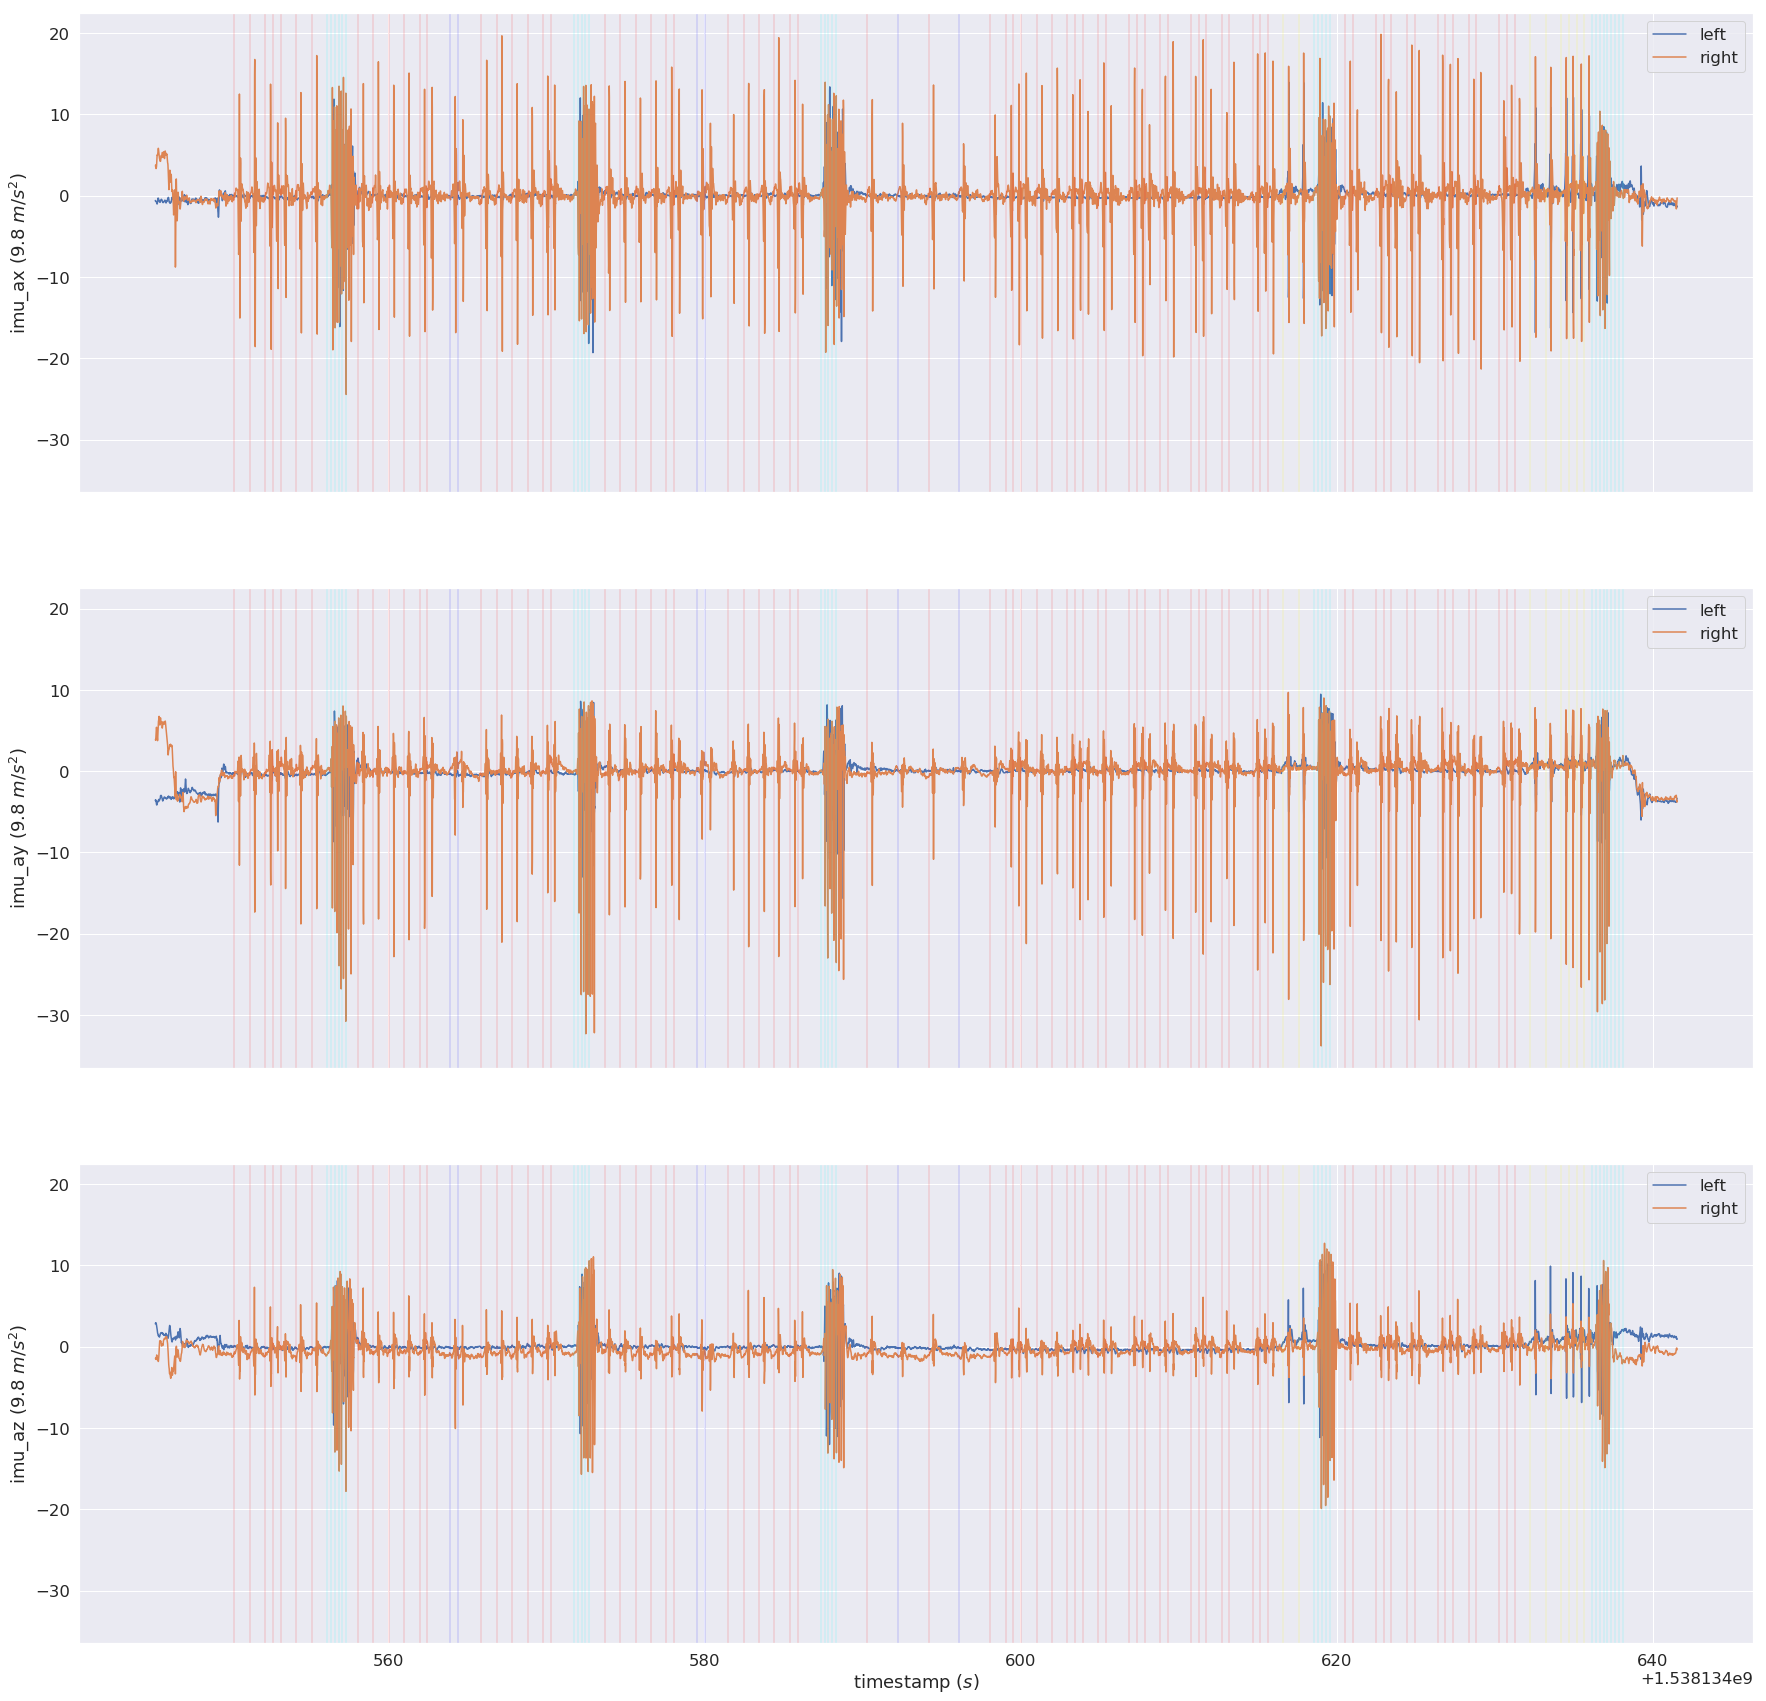

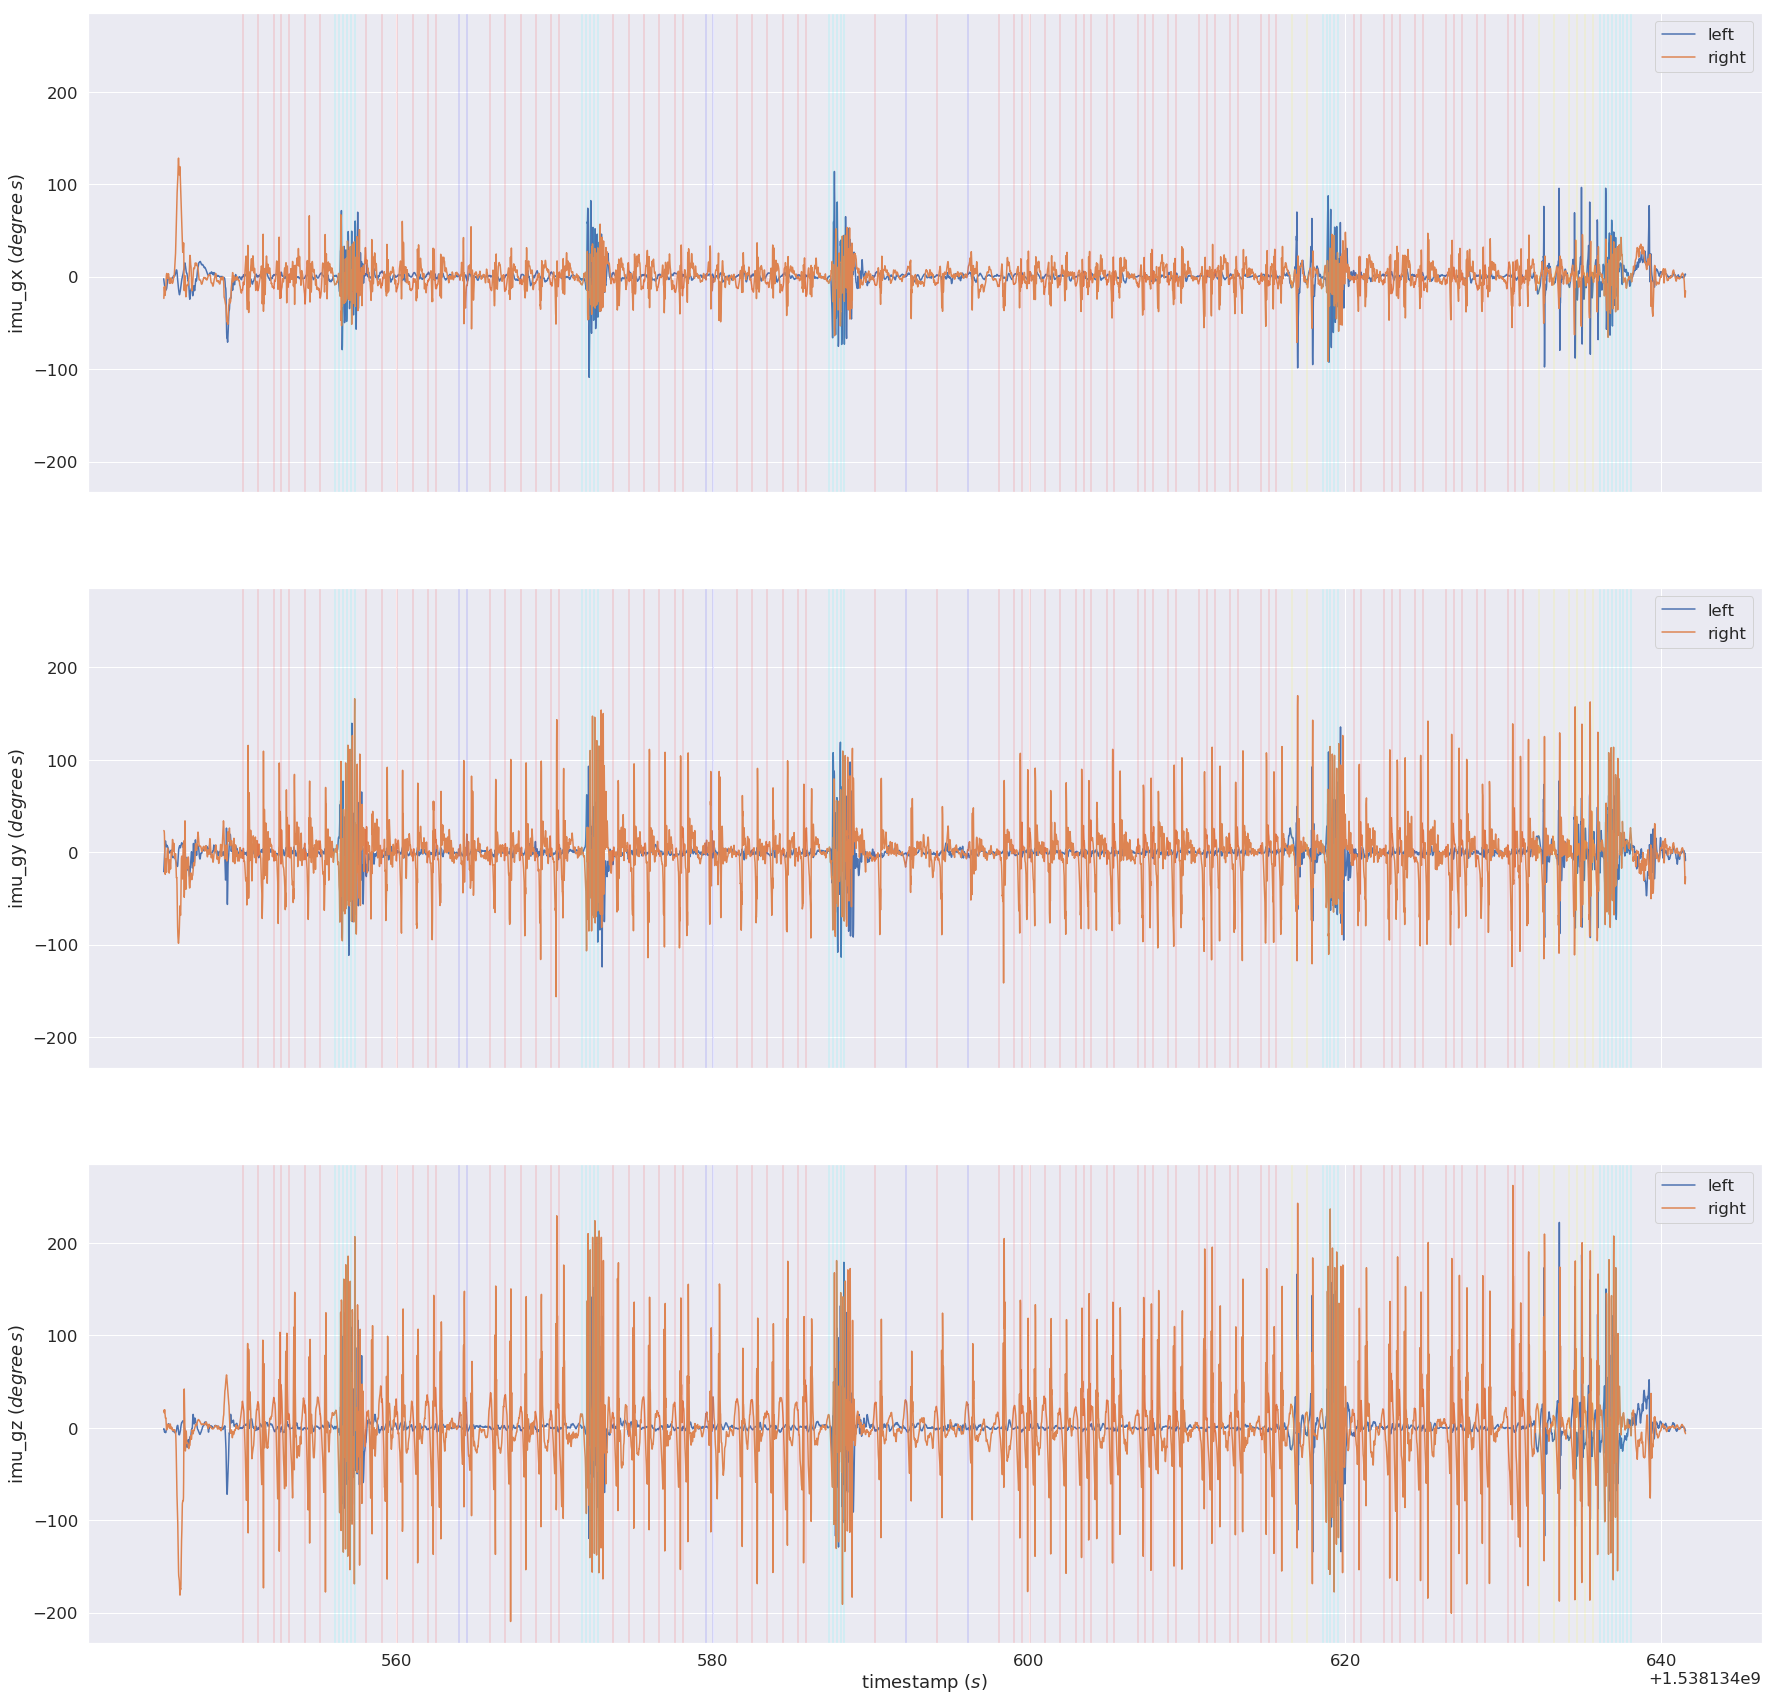

In [9]:
events = play.events
print(events)
marks = []
for id_, _ in enumerate(events):
    event_time = events[id_][0]
    hit_type = transform_drum_note_hit_type(events[id_][1])
    if hit_type > 0:
        marks.append((event_time, tk.COLORS[hit_type]))
        
plot_raw_acc_signal(play.play_dict['L'], play.play_dict['R'], marks=marks)
plot_raw_gyr_signal(play.play_dict['L'], play.play_dict['R'], marks=marks)

## real-time

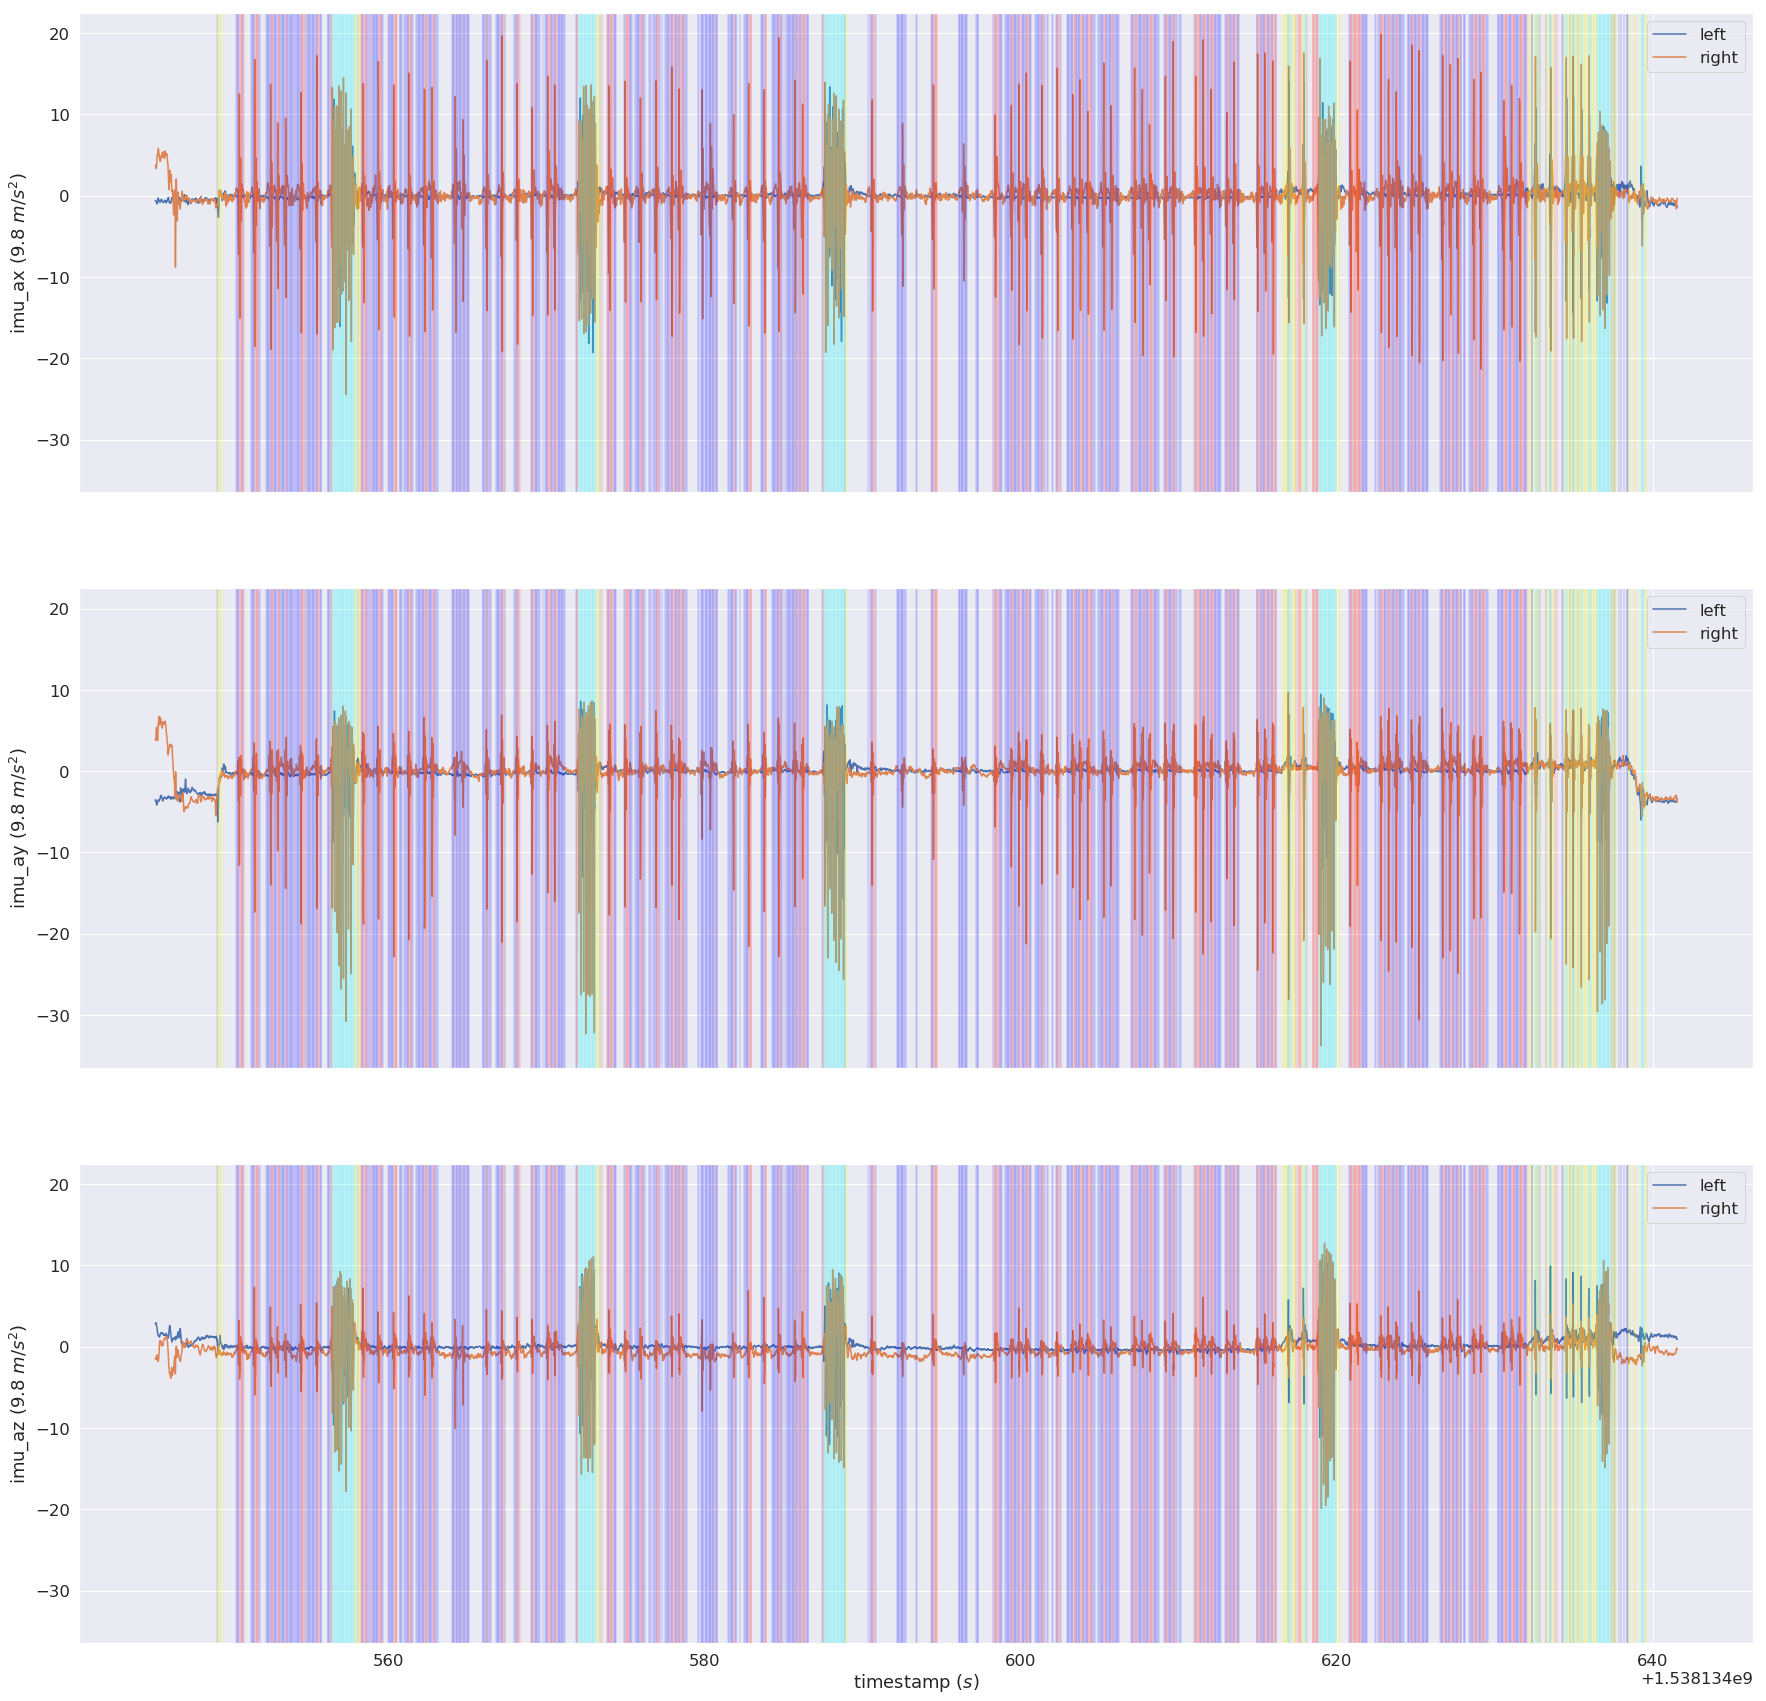

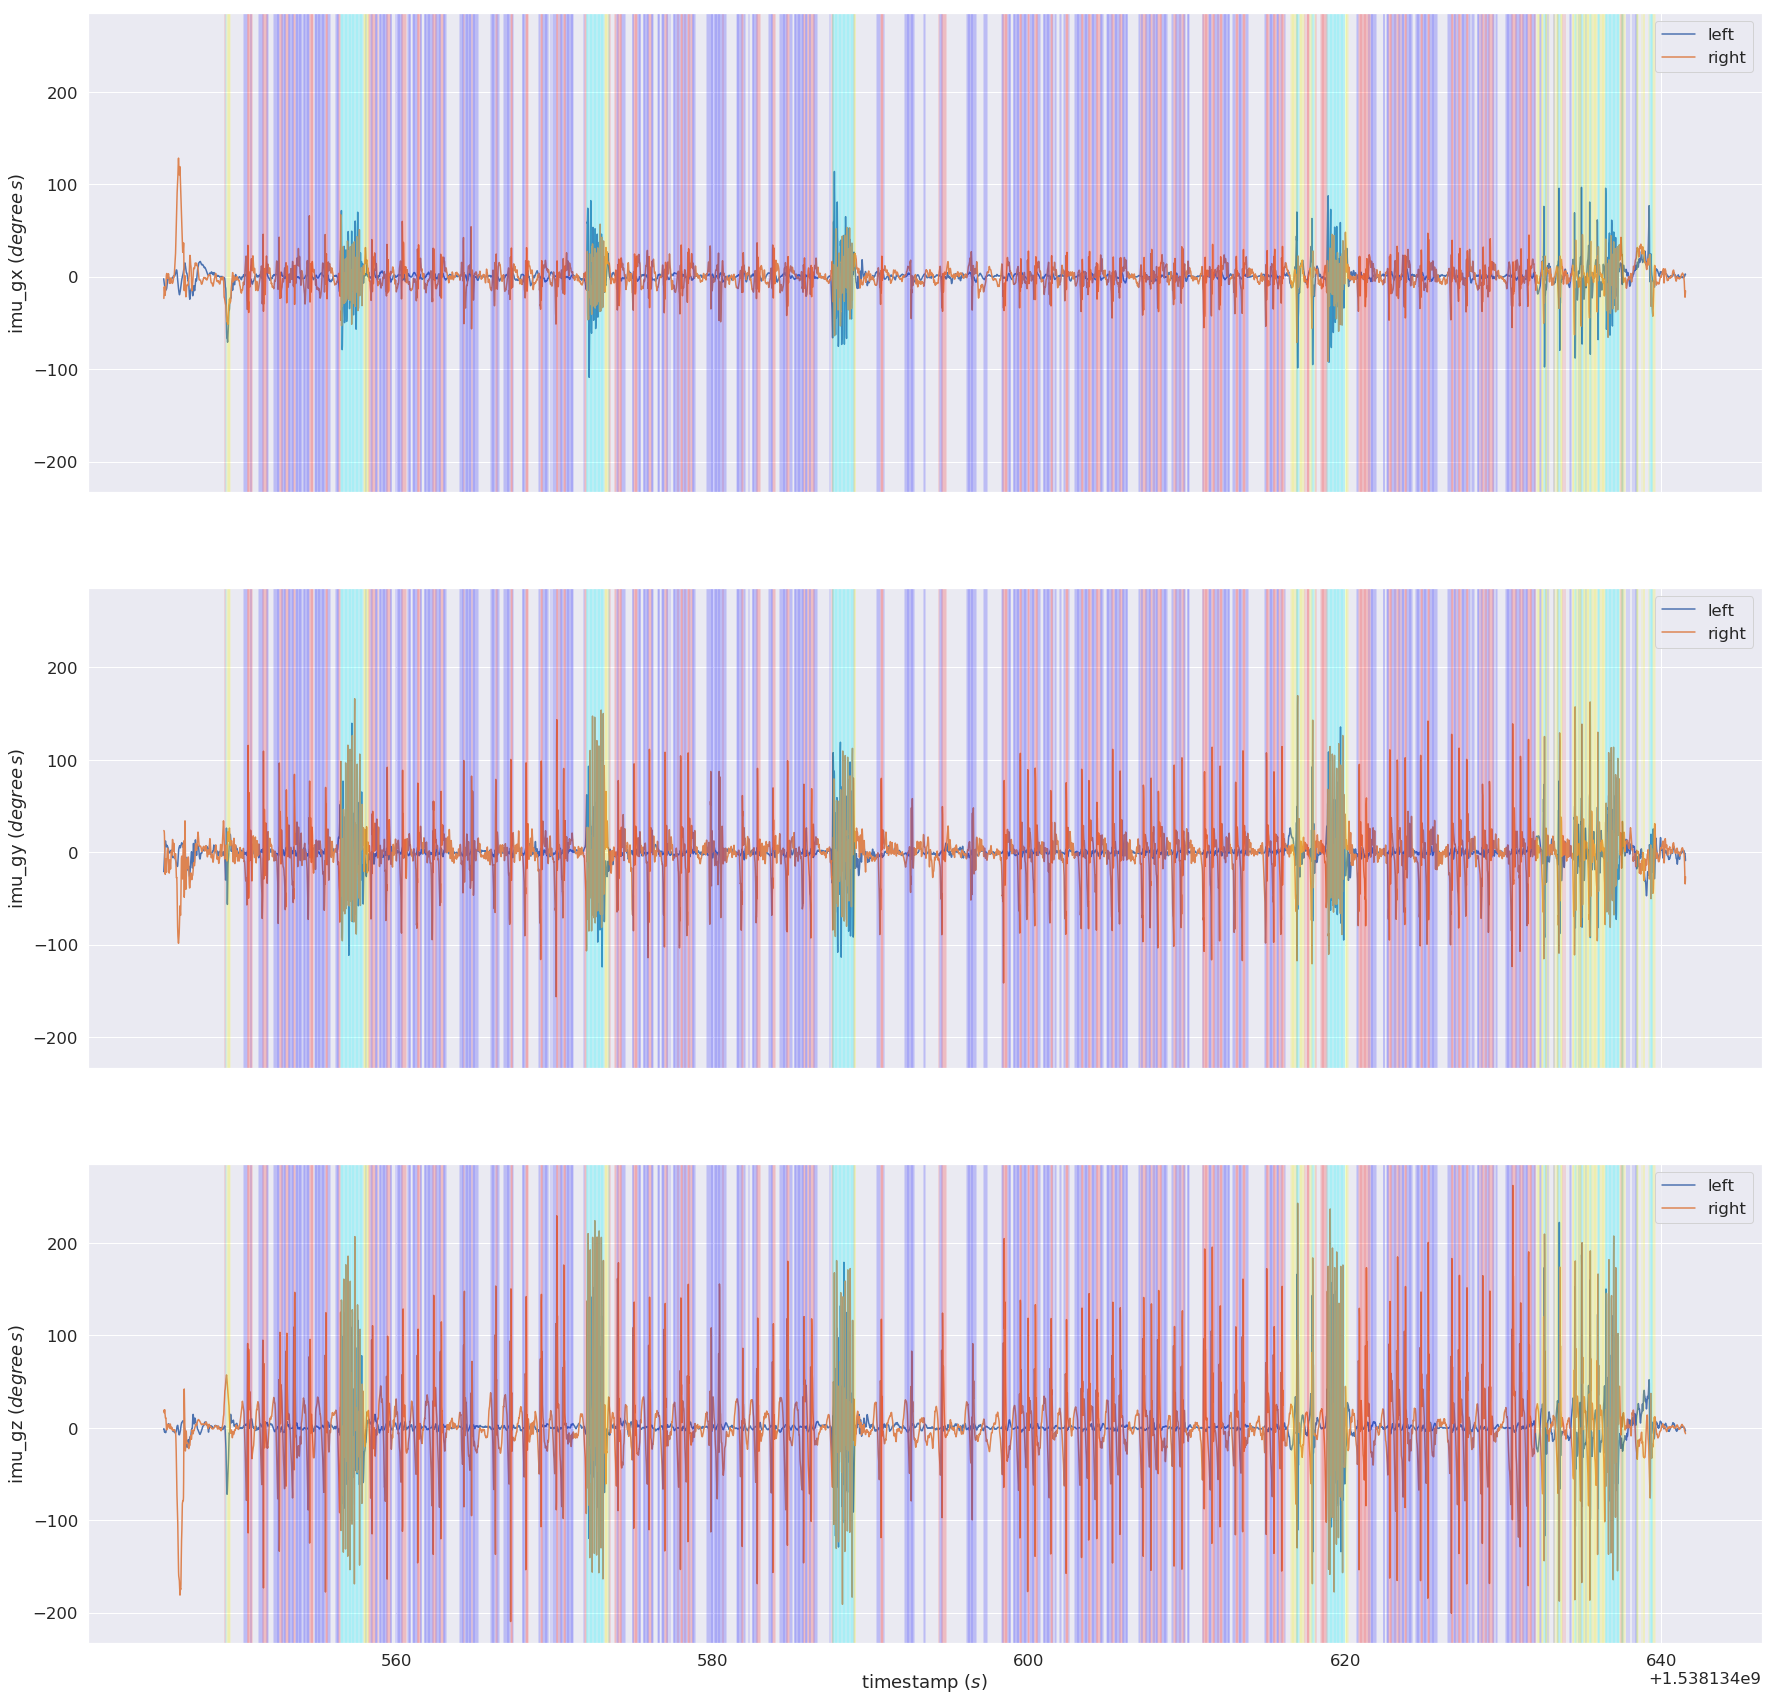

In [10]:
marks = []
for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = transform_hit_type(int(row_[1]))
        if hit_type > 0:
            marks.append((event_time, tk.COLORS[hit_type]))
            
plot_raw_acc_signal(play.play_dict['L'], play.play_dict['R'], marks=marks)
plot_raw_gyr_signal(play.play_dict['L'], play.play_dict['R'], marks=marks)